<a href="https://colab.research.google.com/github/satabarto123/DenV1/blob/main/DenV1Genomics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install biopython


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 18.4 MB/s eta 0:00:00


In [ ]:


from Bio import SeqIO
try:
    from Bio.SeqUtils import gc_fraction
    def GC(sequence):
        return 100 * gc_fraction(sequence, ambiguous="ignore")
except ImportError:
    from Bio.SeqUtils import GC

import pandas as pd
import os
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/MyDrive/DenV1


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'EEG & ZWT based Emotion Detection'
 marked_sequences.fasta
'maximum_likelihood_bootstrap_consensus_tree(btstrap 700)(attempt 1)(mains).mtsx'
'maximum_likelihood_bootstrap_consensus_tree(btstrap 700)(attempt 1).mtsx'
'minimum_evolution_bootstrap_consensus_tree(btstrap 700)(attempt 1).mtsx'
'minimum_evolution_bootstrap_consensus_tree(btstrap 700).mtsx'
'neighbour_joining_bootstrap_consensus_tree(attempt1 bootstrap 700).mtsx'
 neighbour_joining_bootstrap_consensus_tree.mtsx
 sequences.fasta
 temp_sequences.fasta


In [ ]:
file_directory='/content/drive/MyDrive/DenV1/sequences.fasta'

**GC3 Content : ID wise**

In [ ]:
from Bio import SeqIO
from Bio.SeqUtils import gc_fraction
import pandas as pd
import os
import glob
from google.colab import drive

drive.mount('/content/drive')
!ls /content/drive/MyDrive/DenV1

file_directory='/content/drive/MyDrive/DenV1/sequences.fasta'

def gc3_content(sequence):
    """Calculates the GC content of the third position of codons in a sequence."""
    gc3_count = 0
    total_codons = 0
    for i in range(0, len(sequence), 3):
        codon = sequence[i:i+3]
        if len(codon) == 3:
            total_codons += 1
            if codon[2] in ['G', 'C']:
                gc3_count += 1
    if total_codons == 0:
        return 0
    return (gc3_count / total_codons) * 100


gc3_values = []
for record in SeqIO.parse(file_directory, "fasta"):
    gc3_value = gc3_content(str(record.seq))
    gc3_values.append({'ID': record.id, 'GC3': gc3_value})

df = pd.DataFrame(gc3_values)
print(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'EEG & ZWT based Emotion Detection'
 marked_sequences.fasta
'maximum_likelihood_bootstrap_consensus_tree(btstrap 700)(attempt 1)(mains).mtsx'
'maximum_likelihood_bootstrap_consensus_tree(btstrap 700)(attempt 1).mtsx'
'minimum_evolution_bootstrap_consensus_tree(btstrap 700)(attempt 1).mtsx'
'minimum_evolution_bootstrap_consensus_tree(btstrap 700).mtsx'
'neighbour_joining_bootstrap_consensus_tree(attempt1 bootstrap 700).mtsx'
 neighbour_joining_bootstrap_consensus_tree.mtsx
 sequences.fasta
 temp_sequences.fasta
            ID        GC3
0   ON799266.1  43.460034
1   ON123646.1  43.627725
2   ON123650.1  43.627725
3   ON123654.1  43.599776
4   ON123657.1  43.515931
5   ON123661.1  43.599776
6   ON123664.1  43.655674
7   ON123667.1  43.515931
8   ON109597.1  43.460034
9   MW828678.1  43.655674
10  MH891767.1  44.287299
11  MH891771.1  49.646992
12  MG721063.2  4

# **GC3 - ENc Dataframe**

In [ ]:
from Bio import SeqIO
from Bio.SeqUtils import gc_fraction
import pandas as pd
import os
import glob
from google.colab import drive
from Bio.SeqUtils import gc_fraction
!pip install biopython

!pip install --upgrade biopython

try:
    def GC(sequence):
        return 100 * gc_fraction(sequence, ambiguous="ignore")
except ImportError:
    pass

drive.mount('/content/drive')
!ls /content/drive/MyDrive/DenV1

file_directory='/content/drive/MyDrive/DenV1/sequences.fasta'

def gc3_content(sequence):
    """Calculates the GC content of the third position of codons in a sequence."""
    gc3_count = 0
    total_codons = 0
    for i in range(0, len(sequence), 3):
        codon = sequence[i:i+3]
        if len(codon) == 3:
            total_codons += 1
            if codon[2] in ['G', 'C']:
                gc3_count += 1
    if total_codons == 0:
        return 0
    return (gc3_count / total_codons) * 100

def calculate_enc(sequence):
    """Calculates the effective number of codons (ENc) for a given sequence."""
    codon_counts = {}
    for i in range(0, len(sequence), 3):
        codon = sequence[i:i+3]
        if len(codon) == 3:
            codon_counts[codon] = codon_counts.get(codon, 0) + 1

    num_codons = len(codon_counts)
    if num_codons <= 1:
        return 0
    f_values = [count / sum(codon_counts.values()) for count in codon_counts.values()]
    f_squared_sum = sum(f ** 2 for f in f_values)

    enc = 2 + 9 / (f_squared_sum) + 1 / (sum(f ** 3 for f in f_values))
    return enc

results = []
for record in SeqIO.parse(file_directory, "fasta"):
    gc3_value = gc3_content(str(record.seq))
    enc_value = calculate_enc(str(record.seq))
    results.append({'ID': record.id, 'GC3': gc3_value, 'ENc': enc_value})

df = pd.DataFrame(results)
print(df)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'EEG & ZWT based Emotion Detection'
 marked_sequences.fasta
'maximum_likelihood_bootstrap_consensus_tree(btstrap 700)(attempt 1)(mains).mtsx'
'maximum_likelihood_bootstrap_consensus_tree(btstrap 700)(attempt 1).mtsx'
'minimum_evolution_bootstrap_consensus_tree(btstrap 700)(attempt 1).mtsx'
'minimum_evolution_bootstrap_consensus_tree(btstrap 700).mtsx'
'neighbour_joining_bootstrap_consensus_tree(attempt1 bootstrap 700).mtsx'
 neighbour_joining_bootstrap_consensus_tree.mtsx
 sequences.fasta
 temp_sequences.fasta
            ID        GC3          ENc
0   ON799266.1  43.460034  2359.842105
1   ON123646.1  43.627725  2418.715606
2   ON123650.1  43.627725  2378.948960
3   ON123654.1  43.599776  2415.806031
4   ON123657.1  43.515931  2369.744799
5   ON123661.1  43.599776  2396.190415
6   ON123664.1  43.655674  2411.472934
7   ON123667.1  43.515931  2432.208465
8   

In [ ]:
df

,ID,GC3,ENc
0,ON799266.1,43.460034,2359.842105
1,ON123646.1,43.627725,2418.715606
2,ON123650.1,43.627725,2378.948960
3,ON123654.1,43.599776,2415.806031
4,ON123657.1,43.515931,2369.744799
5,ON123661.1,43.599776,2396.190415
6,ON123664.1,43.655674,2411.472934
7,ON123667.1,43.515931,2432.208465
8,ON109597.1,43.460034,2359.842105
9,MW828678.1,43.655674,2362.413320


In [ ]:
import pandas as pd
def calculate_enc(sequence):
    """Calculates the effective number of codons (ENc) for a given sequence."""
    codon_counts = {}
    for i in range(0, len(sequence), 3):
        codon = sequence[i:i+3]
        if len(codon) == 3:
            codon_counts[codon] = codon_counts.get(codon, 0) + 1

    num_codons = len(codon_counts)
    if num_codons <= 1:
        return 0

    f_values = [count / sum(codon_counts.values()) for count in codon_counts.values()]
    f_squared_sum = sum(f ** 2 for f in f_values)

    enc = 2 + 9 / (f_squared_sum) + 1 / (sum(f ** 3 for f in f_values))
    return enc

results = []
for record in SeqIO.parse(file_directory, "fasta"):
    gc3_value = gc3_content(str(record.seq))
    enc_value = calculate_enc(str(record.seq))
    length = len(record.seq)
    results.append({'ID': record.id, 'GC3': gc3_value, 'ENc': enc_value, 'Length': length})

df = pd.DataFrame(results)
print(df)

df


            ID        GC3          ENc  Length
0   ON799266.1  43.460034  2359.842105   10735
1   ON123646.1  43.627725  2418.715606   10735
2   ON123650.1  43.627725  2378.948960   10735
3   ON123654.1  43.599776  2415.806031   10735
4   ON123657.1  43.515931  2369.744799   10735
5   ON123661.1  43.599776  2396.190415   10735
6   ON123664.1  43.655674  2411.472934   10735
7   ON123667.1  43.515931  2432.208465   10735
8   ON109597.1  43.460034  2359.842105   10735
9   MW828678.1  43.655674  2362.413320   10735
10  MH891767.1  44.287299  2612.214942   10820
11  MH891771.1  49.646992  2276.367768   10623
12  MG721063.2  46.506428  2080.952150   10736
13  MH822959.2  43.713246  2370.915293   10714
14  KX618705.1  43.487982  2366.869893   10735
15  KX618706.1  43.460034  2363.436423   10735
16  KU509255.1  43.105951  2332.160409   10335
17  KJ755855.1  50.209790  2268.110375   10727
18  KF289073.1  43.446534  2344.992551   10690
19  JQ917404.1  43.616423  2385.172192   10669
20  KF289072.

,ID,GC3,ENc,Length
0,ON799266.1,43.460034,2359.842105,10735
1,ON123646.1,43.627725,2418.715606,10735
2,ON123650.1,43.627725,2378.948960,10735
3,ON123654.1,43.599776,2415.806031,10735
4,ON123657.1,43.515931,2369.744799,10735
5,ON123661.1,43.599776,2396.190415,10735
6,ON123664.1,43.655674,2411.472934,10735
7,ON123667.1,43.515931,2432.208465,10735
8,ON109597.1,43.460034,2359.842105,10735
9,MW828678.1,43.655674,2362.413320,10735


# **GC3 VS ENc**

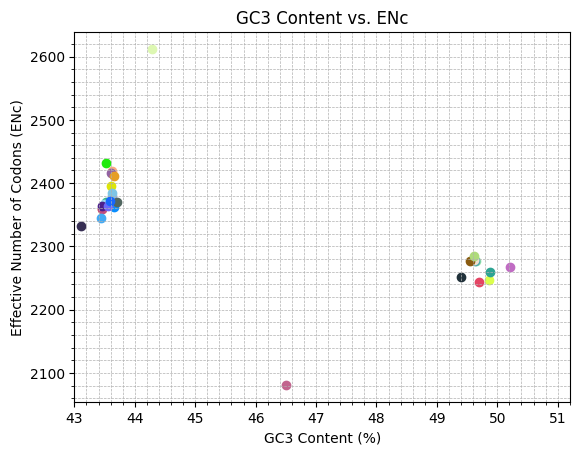

In [ ]:


import matplotlib.pyplot as plt
import random

colors = [
    "#" + "".join([random.choice("0123456789ABCDEF") for j in range(6)])
    for i in range(len(df))
]

fig, ax = plt.subplots()

for i in range(len(df)):
    ax.scatter(df['GC3'][i], df['ENc'][i], color=colors[i], label=df['ID'][i])

ax.set_xlabel('GC3 Content (%)')
ax.set_ylabel('Effective Number of Codons (ENc)')
ax.set_title('GC3 Content vs. ENc')

ax.set_xlim(43, df['GC3'].max() + 1)

ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.minorticks_on()

plt.show()


# **RSU for all strains **

In [ ]:


from collections import Counter

def calculate_rscu(sequence):
    codon_counts = Counter()
    for i in range(0, len(sequence), 3):
        codon = sequence[i:i + 3]
        if len(codon) == 3:
            codon_counts[codon] += 1

    rscu_values = {}
    for codon, count in codon_counts.items():
        synonymous_codons = [c for c in codon_counts if c[0:2] == codon[0:2]]
        num_synonymous = len(synonymous_codons)
        if num_synonymous > 1:
            expected_frequency = sum(codon_counts[c] for c in synonymous_codons) / num_synonymous
            rscu_values[codon] = count / expected_frequency
        else:
            rscu_values[codon] = 1.0
    return rscu_values

rscu_results = []
for record in SeqIO.parse(file_directory, "fasta"):
    rscu_values = calculate_rscu(str(record.seq))
    rscu_results.append({'ID': record.id, 'RSCU': rscu_values})

for result in rscu_results:
    print(f"Sequence ID: {result['ID']}")
    for codon, rscu in result['RSCU'].items():
        print(f"  {codon}: {rscu:.2f}")

highly_expressed = []
lowly_expressed = []
for result in rscu_results:
    for codon, rscu in result['RSCU'].items():
        if rscu > 1.2:
            highly_expressed.append((result['ID'], codon, rscu))
        elif rscu < 0.8:
            lowly_expressed.append((result['ID'], codon, rscu))

print("\nHighly Expressed Codons (RSCU > 1.2):")
for seq_id, codon, rscu in highly_expressed:
    print(f"  {seq_id}: {codon} ({rscu:.2f})")

print("\nLowly Expressed Codons (RSCU < 0.8):")
for seq_id, codon, rscu in lowly_expressed:
    print(f"  {seq_id}: {codon} ({rscu:.2f})")


Sequence ID: ON799266.1
  AGT: 0.75
  TGT: 0.77
  TAG: 1.03
  TCT: 1.61
  ACG: 0.45
  TGG: 1.18
  ACC: 1.23
  GAC: 0.91
  AAG: 0.98
  AAC: 1.10
  TTC: 1.09
  GAA: 1.33
  TCG: 0.31
  GCT: 1.88
  TGC: 0.64
  TTA: 0.56
  TAA: 1.42
  CAG: 1.05
  TTT: 1.46
  ATT: 1.12
  AGA: 1.17
  GAG: 0.72
  ATC: 1.16
  GAT: 1.04
  CAA: 1.36
  CCA: 1.79
  GGG: 0.72
  TCA: 0.89
  GTC: 0.87
  TAT: 1.32
  CGC: 0.90
  AAA: 1.61
  CCG: 0.32
  CGT: 1.08
  ACA: 1.68
  GTT: 1.58
  GGC: 0.87
  CTC: 0.97
  AGG: 1.10
  CAT: 2.06
  AAT: 1.30
  GGT: 0.90
  AGC: 0.98
  CCT: 1.12
  CCC: 0.78
  ATG: 1.27
  ACR: 0.03
  AAR: 0.01
  GCC: 0.88
  CAC: 1.50
  GCA: 0.85
  GGA: 1.52
  ACT: 1.62
  CTT: 1.59
  GTG: 1.03
  YCT: 1.00
  TGA: 1.41
  TAC: 1.18
  CTA: 0.54
  TTG: 0.90
  CTG: 0.90
  CGA: 1.12
  GCG: 0.39
  TCC: 1.20
  CGG: 0.90
  ATA: 0.44
  GTA: 0.53
  RCC: 1.00
  YTG: 1.00
  TAY: 0.05
  RGG: 1.00
  YGG: 1.00
  RAA: 1.50
  RAG: 0.50
  CAS: 0.02
  YTS: 1.00
  CAY: 0.02
Sequence ID: ON123646.1
  AGT: 0.73
  TGT: 0.78
  TA

# **RSCU1 (MAX) VS RSCU2(MIN)**  

In [ ]:
import itertools

all_codons = ["".join(c) for c in itertools.product("ACGT", repeat=3)]
rscu_df = pd.DataFrame(index=all_codons, columns=['RSCU1', 'RSCU2'])



for result in rscu_results:
    for codon, rscu in result['RSCU'].items():
        if codon in rscu_df.index:
            rscu_df.loc[codon, 'RSCU1'] = max(rscu_df.loc[codon, 'RSCU1'], rscu) if pd.notna(rscu_df.loc[codon, 'RSCU1']) else rscu
            rscu_df.loc[codon, 'RSCU2'] = min(rscu_df.loc[codon, 'RSCU2'], rscu) if pd.notna(rscu_df.loc[codon, 'RSCU2']) else rscu

rscu_df.fillna(0, inplace=True)
print(rscu_df)


        RSCU1     RSCU2
AAA  1.612091  1.208845
AAC  1.111111  0.684058
AAG  1.495652      0.74
AAT  1.319095  0.428571
ACA  1.930435  1.244019
..        ...       ...
TGT  0.960912      0.64
TTA  0.913043  0.455285
TTC  1.133858  0.739726
TTG  1.604278  0.793388
TTT  1.733333  0.673913

[64 rows x 2 columns]


# **GC-GC3**

In [ ]:
import pandas as pd
gc_values = []
gc3_values = []

for record in SeqIO.parse(file_directory, "fasta"):
    sequence = str(record.seq)
    gc_values.append({'ID': record.id, 'GC': GC(sequence)})
    gc3_values.append({'ID': record.id, 'GC3': gc3_content(sequence)})

df_gc = pd.DataFrame(gc_values)
df_gc3 = pd.DataFrame(gc3_values)

df_combined = pd.merge(df_gc, df_gc3, on='ID')

print(df_combined)


            ID         GC        GC3
0   ON799266.1  46.585934  43.460034
1   ON123646.1  46.520727  43.627725
2   ON123650.1  46.585934  43.627725
3   ON123654.1  46.464835  43.599776
4   ON123657.1  46.567303  43.515931
5   ON123661.1  46.613880  43.599776
6   ON123664.1  46.474150  43.655674
7   ON123667.1  46.530042  43.515931
8   ON109597.1  46.585934  43.460034
9   MW828678.1  46.669772  43.655674
10  MH891767.1  46.395564  44.287299
11  MH891771.1  46.681728  49.646992
12  MG721063.2  46.535022  46.506428
13  MH822959.2  46.714579  43.713246
14  KX618705.1  46.492781  43.487982
15  KX618706.1  46.530042  43.460034
16  KU509255.1  46.376391  43.105951
17  KJ755855.1  46.443554  50.209790
18  KF289073.1  46.641721  43.446534
19  JQ917404.1  46.677289  43.616423
20  KF289072.1  46.649170  43.560180
21  JQ692085.1  46.658543  43.588301
22  JQ922544.1  46.569452  49.691531
23  JQ922545.1  46.588235  49.392827
24  JQ922546.1  46.506612  49.859313
25  JQ922548.1  46.742686  49.635446
2

In [ ]:
rscu_df


,RSCU1,RSCU2
AAA,1.612091,1.208845
AAC,1.111111,0.684058
AAG,1.495652,0.74
AAT,1.319095,0.428571
ACA,1.930435,1.244019
...,...,...
TGT,0.960912,0.64
TTA,0.913043,0.455285
TTC,1.133858,0.739726
TTG,1.604278,0.793388


# **CAI (Codon Adaptive Index)**

In [ ]:
import pandas as pd
import numpy as np

def calculate_cai(reference_rscu):

  cai_values = []
  for codon, rscu in reference_rscu.items():
    amino_acid = codon[:2]
    max_rscu = reference_rscu[reference_rscu.index.str.startswith(amino_acid)].max()
    relative_adaptiveness = rscu / max_rscu
    cai = np.exp(np.log(relative_adaptiveness))
    cai_values.append({'codon': codon, 'CAI': cai})

  return pd.DataFrame(cai_values)

cai_df1 = calculate_cai(rscu_df['RSCU1'])
cai_df2 = calculate_cai(rscu_df['RSCU2'])

print("CAI using RSCU1:")
print(cai_df1)
print("\nCAI using RSCU2:")
print(cai_df2)



CAI using RSCU1:
   codon       CAI
0    AAA  1.000000
1    AAC  0.689236
2    AAG  0.927772
3    AAT  0.818251
4    ACA  1.000000
..   ...       ...
59   TGT  0.398729
60   TTA  0.526756
61   TTC  0.654149
62   TTG  0.925545
63   TTT  1.000000

[64 rows x 2 columns]

CAI using RSCU2:
   codon       CAI
0    AAA  1.000000
1    AAC  0.565877
2    AAG  0.612154
3    AAT  0.354530
4    ACA  1.000000
..   ...       ...
59   TGT  0.595443
60   TTA  0.573848
61   TTC  0.932363
62   TTG  1.000000
63   TTT  0.849411

[64 rows x 2 columns]


In [ ]:
df


,ID,GC3,ENc,Length
0,ON799266.1,43.460034,2359.842105,10735
1,ON123646.1,43.627725,2418.715606,10735
2,ON123650.1,43.627725,2378.948960,10735
3,ON123654.1,43.599776,2415.806031,10735
4,ON123657.1,43.515931,2369.744799,10735
5,ON123661.1,43.599776,2396.190415,10735
6,ON123664.1,43.655674,2411.472934,10735
7,ON123667.1,43.515931,2432.208465,10735
8,ON109597.1,43.460034,2359.842105,10735
9,MW828678.1,43.655674,2362.413320,10735


# **Correlation b/a Length and GC3 and Enc**




In [ ]:
import pandas as pd
import numpy as np

def calculate_correlations(df):

  df['GC3'] = pd.to_numeric(df['GC3'], errors='coerce')
  df['ENc'] = pd.to_numeric(df['ENc'], errors='coerce')



  df = df.dropna(subset=['GC3', 'ENc', 'Length'])

  if not pd.api.types.is_numeric_dtype(df['GC3']) or not pd.api.types.is_numeric_dtype(df['ENc']):
    raise ValueError("GC3 or ENc column is not numeric")

  correlation_gc3 = df['Length'].corr(df['GC3'])
  correlation_enc = df['Length'].corr(df['ENc'])

  return correlation_gc3, correlation_enc

correlation_gc3, correlation_enc = calculate_correlations(df)
print(f"Correlation between  Length and GC3: {correlation_gc3:.2f}")
print(f"Correlation between  Length and ENc: {correlation_enc:.2f}")



Correlation between  Length and GC3: -0.08
Correlation between  Length and ENc: 0.27


# **T-Series Test**

In [ ]:

from scipy import stats

t_statistic_enc, p_value_enc = stats.ttest_rel(df['Length'], df['ENc'])

print(f"T-test for Length and ENc:")
print(f"  T-statistic: {t_statistic_enc:.2f}")
print(f"  P-value: {p_value_enc:.3f}")

t_statistic_gc3, p_value_gc3 = stats.ttest_rel(df['Length'], df['GC3'])

print("\nT-test for Length and GC3:")
print(f"  T-statistic: {t_statistic_gc3:.2f}")
print(f"  P-value: {p_value_gc3:.3f}")



T-test for Length and ENc:
  T-statistic: 446.80
  P-value: 0.000

T-test for Length and GC3:
  T-statistic: 736.45
  P-value: 0.000


# **PCA (Principal Component 1' and 'Principal Component 2')**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['Length', 'GC3', 'ENc']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

pca_df['ID'] = df['ID']

print(pca_df)

print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)

"""
Explanation:

1. Feature Selection: We select the features 'Length', 'GC3', and 'ENc' from your DataFrame as these are the numerical features you've calculated and seem relevant for analysis.

2. Standardization: We use StandardScaler to standardize the features. This is important for PCA because it is sensitive to the scales of the features. Standardization ensures that all features have a mean of 0 and a standard deviation of 1.

3. PCA: We apply PCA with 2 components to reduce the dimensionality of the data and capture the most important patterns of variation.

4. PCA DataFrame: We create a DataFrame 'pca_df' to store the principal components (PC1 and PC2) along with the sequence IDs for reference.

5. Explained Variance Ratio: The 'explained_variance_ratio_' attribute of the PCA object tells us how much of the total variance in the data is explained by each principal component.

6. Plot: We plot PC1 vs. PC2 to visualize the distribution of the data in the reduced dimensional space.

Interpretation:

- Each principal component is a linear combination of the original features.
- PC1 captures the direction of greatest variance in the data.
- PC2 captures the direction of second greatest variance, orthogonal to PC1.
- The explained variance ratio tells us how much information is retained by each principal component.
- The plot shows how the sequences cluster or separate based on their PC values.

Values in the PCA DataFrame:

- 'Principal Component 1' and 'Principal Component 2': These are the coordinates of each sequence in the reduced dimensional space defined by the principal components.
- 'ID': This is the sequence identifier corresponding to each row.

The values in the principal component columns are calculated by projecting the original standardized feature values onto the principal component axes. These values represent how much each sequence contributes to the variation captured by each principal component.
"""


    Principal Component 1  Principal Component 2          ID
0                0.825502              -0.119621  ON799266.1
1                1.246564              -0.088148  ON123646.1
2                0.936693              -0.124229  ON123650.1
3                1.230174              -0.087131  ON123654.1
4                0.890101              -0.117951  ON123657.1
5                1.077324              -0.104928  ON123661.1
6                1.183845              -0.098377  ON123664.1
7                1.376832              -0.061277  ON123667.1
8                0.825502              -0.119621  ON109597.1
9                0.801561              -0.142889  MW828678.1
10               2.960651              -1.009725  MH891767.1
11              -1.682832               0.326958  MH891771.1
12              -2.028269              -0.783192  MG721063.2
13               0.767273               0.107026  MH822959.2
14               0.873981              -0.116902  KX618705.1
15               0.85350

"\nExplanation:\n\n1. Feature Selection: We select the features 'Length', 'GC3', and 'ENc' from your DataFrame as these are the numerical features you've calculated and seem relevant for analysis.\n\n2. Standardization: We use StandardScaler to standardize the features. This is important for PCA because it is sensitive to the scales of the features. Standardization ensures that all features have a mean of 0 and a standard deviation of 1.\n\n3. PCA: We apply PCA with 2 components to reduce the dimensionality of the data and capture the most important patterns of variation.\n\n4. PCA DataFrame: We create a DataFrame 'pca_df' to store the principal components (PC1 and PC2) along with the sequence IDs for reference.\n\n5. Explained Variance Ratio: The 'explained_variance_ratio_' attribute of the PCA object tells us how much of the total variance in the data is explained by each principal component.\n\n6. Plot: We plot PC1 vs. PC2 to visualize the distribution of the data in the reduced dim

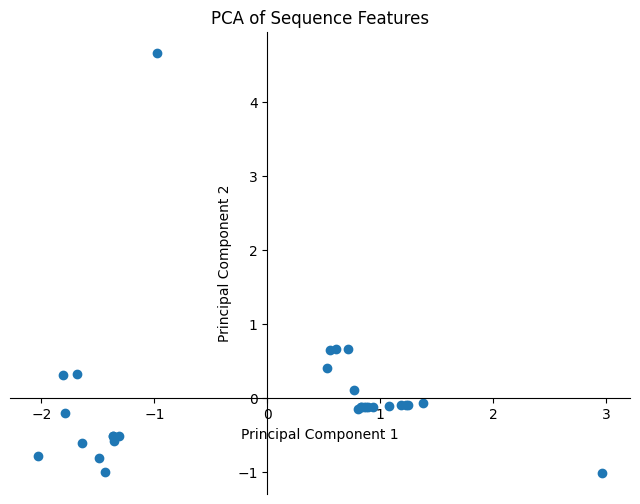

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Sequence Features')

ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.show()
